In [1]:
setwd("C:/Users/dheer/Desktop/UTD/4-Spring 2017/R for Data Scientists/Projects/MidTerm/Ames Housing/Ames Housing/")
library(readr)
AmesHousing <- read_delim("AmesHousing.txt", "\t", escape_double = FALSE, trim_ws = TRUE)

Parsed with column specification:
cols(
  .default = col_character(),
  Order = col_integer(),
  `Lot Frontage` = col_integer(),
  `Lot Area` = col_integer(),
  `Overall Qual` = col_integer(),
  `Overall Cond` = col_integer(),
  `Year Built` = col_integer(),
  `Year Remod/Add` = col_integer(),
  `Mas Vnr Area` = col_integer(),
  `BsmtFin SF 1` = col_integer(),
  `BsmtFin SF 2` = col_integer(),
  `Bsmt Unf SF` = col_integer(),
  `Total Bsmt SF` = col_integer(),
  `1st Flr SF` = col_integer(),
  `2nd Flr SF` = col_integer(),
  `Low Qual Fin SF` = col_integer(),
  `Gr Liv Area` = col_integer(),
  `Bsmt Full Bath` = col_integer(),
  `Bsmt Half Bath` = col_integer(),
  `Full Bath` = col_integer(),
  `Half Bath` = col_integer()
  # ... with 17 more columns
)
See spec(...) for full column specifications.


In [2]:
dim(AmesHousing)

[1] 2930   82

In [3]:
houseData = as.data.frame(unclass(AmesHousing))

In [4]:
summary(houseData)

     Order                PID        MS.SubClass     MS.Zoning   
 Min.   :   1.0   0526301100:   1   020    :1079   A (agr):   2  
 1st Qu.: 733.2   0526302030:   1   060    : 575   C (all):  25  
 Median :1465.5   0526302040:   1   050    : 287   FV     : 139  
 Mean   :1465.5   0526302110:   1   120    : 192   I (all):   2  
 3rd Qu.:2197.8   0526302120:   1   030    : 139   RH     :  27  
 Max.   :2930.0   0526303060:   1   160    : 129   RL     :2273  
                  (Other)   :2924   (Other): 529   RM     : 462  
  Lot.Frontage       Lot.Area       Street      Alley      Lot.Shape 
 Min.   : 21.00   Min.   :  1300   Grvl:  12   Grvl: 120   IR1: 979  
 1st Qu.: 58.00   1st Qu.:  7440   Pave:2918   Pave:  78   IR2:  76  
 Median : 68.00   Median :  9436               NA's:2732   IR3:  16  
 Mean   : 69.22   Mean   : 10148                           Reg:1859  
 3rd Qu.: 80.00   3rd Qu.: 11555                                     
 Max.   :313.00   Max.   :215245                    

In [5]:
lr.model <- lm(SalePrice~., data = houseData)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


The error is because there is no enough variation in dependent variable with only one value. So, we need to drop the variable irrespective of the variable.

So, we again go through the summary of the dataset again

In [6]:
summary(houseData)

     Order                PID        MS.SubClass     MS.Zoning   
 Min.   :   1.0   0526301100:   1   020    :1079   A (agr):   2  
 1st Qu.: 733.2   0526302030:   1   060    : 575   C (all):  25  
 Median :1465.5   0526302040:   1   050    : 287   FV     : 139  
 Mean   :1465.5   0526302110:   1   120    : 192   I (all):   2  
 3rd Qu.:2197.8   0526302120:   1   030    : 139   RH     :  27  
 Max.   :2930.0   0526303060:   1   160    : 129   RL     :2273  
                  (Other)   :2924   (Other): 529   RM     : 462  
  Lot.Frontage       Lot.Area       Street      Alley      Lot.Shape 
 Min.   : 21.00   Min.   :  1300   Grvl:  12   Grvl: 120   IR1: 979  
 1st Qu.: 58.00   1st Qu.:  7440   Pave:2918   Pave:  78   IR2:  76  
 Median : 68.00   Median :  9436               NA's:2732   IR3:  16  
 Mean   : 69.22   Mean   : 10148                           Reg:1859  
 3rd Qu.: 80.00   3rd Qu.: 11555                                     
 Max.   :313.00   Max.   :215245                    

In [7]:
houseData$PID <- NULL
houseData$Order <- NULL
houseData$Pool.QC <- NULL
houseData$Misc.Feature <- NULL
houseData$Fence <- NULL
houseData$Misc.Val <- NULL
houseData$Utilities <- NULL
houseData$Alley <- NULL
houseData$Street <- NULL
houseData$Garage.Cond <- NULL
houseData$Garage.Qual <- NULL
houseData$Fireplace.Qu <- NULL
houseData$Fireplace.Qu <- NULL
houseData$Electrical <- NULL
houseData$BsmtFin.SF.2 <- NULL
houseData$Heating <- NULL
houseData$Low.Qual.Fin.SF <- NULL

In [8]:
dim(houseData)

[1] 2930   66

In [9]:
houseData <- na.omit(houseData)

In [10]:
dim(houseData)

[1] 2219   66

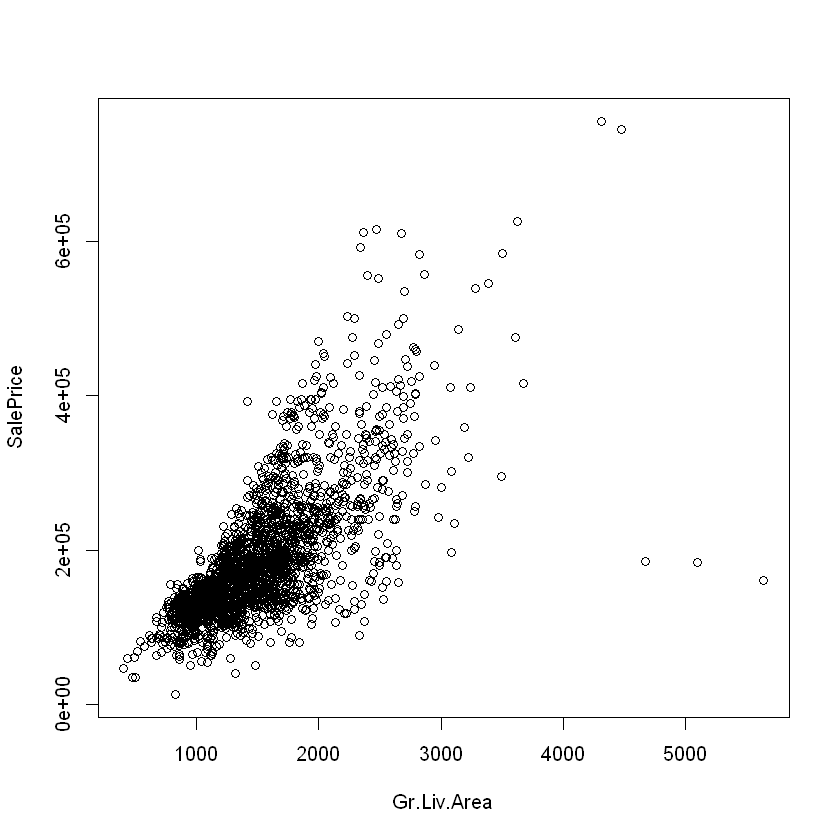

In [11]:
attach(houseData)
plot(SalePrice ~ Gr.Liv.Area)

We will remove the outliers 

In [12]:
houseData <- houseData[Gr.Liv.Area <= 4000,]

In [13]:
dim(houseData)

[1] 2214   66

In [14]:
houseData <- as.data.frame(unclass(na.omit(houseData)))
lr.model <- lm(SalePrice~., data = houseData)

In [15]:
dim(houseData)

[1] 2214   66

In [16]:
summary(lr.model)


Call:
lm(formula = SalePrice ~ ., data = houseData)

Residuals:
    Min      1Q  Median      3Q     Max 
-139254   -9672      65    8955  139115 

Coefficients: (2 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -6.208e+04  7.289e+05  -0.085 0.932132    
MS.SubClass030         6.310e+03  3.417e+03   1.847 0.064959 .  
MS.SubClass040         7.737e+03  9.842e+03   0.786 0.431914    
MS.SubClass045         1.231e+04  1.454e+04   0.846 0.397420    
MS.SubClass050         4.140e+03  6.269e+03   0.660 0.509097    
MS.SubClass060        -2.763e+03  5.933e+03  -0.466 0.641492    
MS.SubClass070         5.756e+03  6.201e+03   0.928 0.353365    
MS.SubClass075        -1.750e+03  9.984e+03  -0.175 0.860893    
MS.SubClass080        -1.344e+04  9.535e+03  -1.409 0.158857    
MS.SubClass085        -6.725e+03  7.749e+03  -0.868 0.385542    
MS.SubClass090        -1.946e+04  6.164e+03  -3.157 0.001616 ** 
MS.SubClass120   

WE see that there are few variables that are linear dependent to other variables.

In [17]:
houseData$Bldg.Type <- NULL
houseData$Exterior.2nd <- NULL

In [18]:
dim(houseData)

[1] 2214   64

Now it's ok. All the variables are removed that are not so imp. Now we will proceed.

### Now First we apply the basic linear model on the data

In [19]:
lr.model <- lm(SalePrice~., data = houseData)
summary(lr.model)


Call:
lm(formula = SalePrice ~ ., data = houseData)

Residuals:
    Min      1Q  Median      3Q     Max 
-139848   -9679       3    9026  139711 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -5.838e+04  7.258e+05  -0.080 0.935898    
MS.SubClass030         6.641e+03  3.408e+03   1.949 0.051452 .  
MS.SubClass040         7.990e+03  9.831e+03   0.813 0.416467    
MS.SubClass045         1.289e+04  1.453e+04   0.887 0.375036    
MS.SubClass050         4.762e+03  6.237e+03   0.763 0.445283    
MS.SubClass060        -2.072e+03  5.908e+03  -0.351 0.725822    
MS.SubClass070         6.550e+03  6.165e+03   1.062 0.288170    
MS.SubClass075        -2.565e+03  9.929e+03  -0.258 0.796183    
MS.SubClass080        -1.206e+04  9.509e+03  -1.268 0.204784    
MS.SubClass085        -6.184e+03  7.709e+03  -0.802 0.422541    
MS.SubClass090        -1.878e+04  6.149e+03  -3.054 0.002287 ** 
MS.SubClass120        -2.086e+04  2.744e+03  -7.601 4.48e-

From the Summary of the linear model, we see that the value of Adjusted R^2 is 0.939 which is very good, but we should not forgot that adding more predictors will also increase its value. So, here there are 64 variable and we should do more.

Warning message:
"not plotting observations with leverage one:
  168, 511, 1065, 1541, 1561, 1726, 1879, 2171"Warning message:
"not plotting observations with leverage one:
  168, 511, 1065, 1541, 1561, 1726, 1879, 2171"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

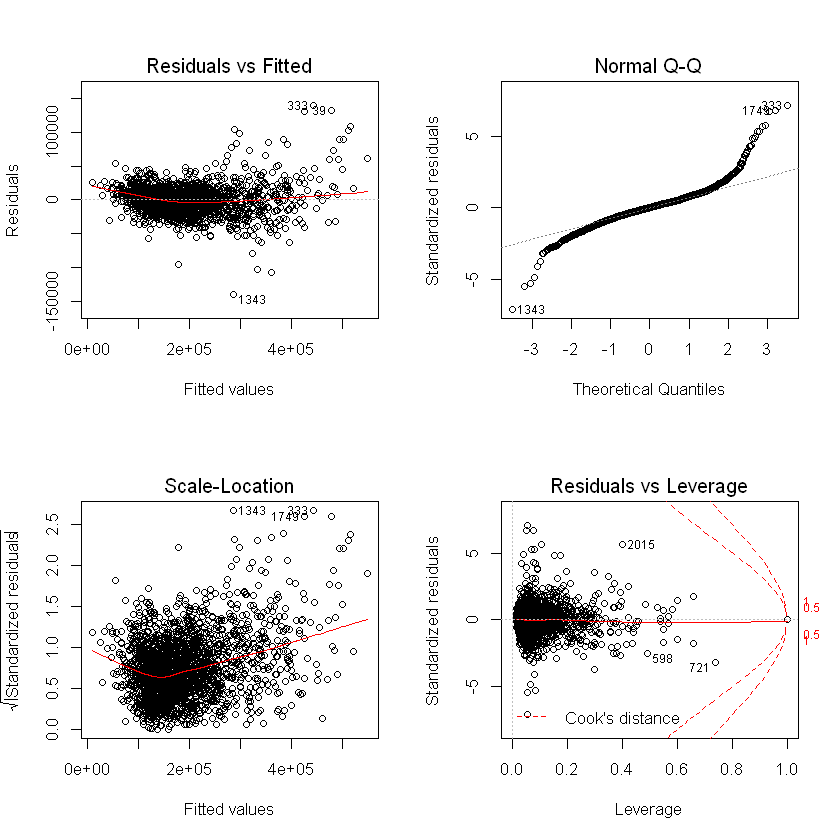

In [20]:
par(mfrow=c(2,2))
plot(lr.model)

We see that from plot the spread of residuals is increasing with the increase in fitted values. The Spread is not constant that is non constant variance.

Also some non linearity.

From the Normal Q-Q plot, we can say it is not normal and 

In [21]:
mean(lr.model$residuals^2)

[1] 368761675

In [22]:
summary(SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12790  131500  163500  186000  217500  755000 

In [23]:
sqrt(mean(lr.model$residuals^2)) / 186000

[1] 0.1032428

The SQRT(MSE) is about 10.32% still we can find a better fit.

Now we will do Leave One Out Cross Validation (LOOCV)

In [24]:
library(boot)
lr.model_boot = glm(SalePrice~., data = houseData)
summary(lr.model_boot)


Call:
glm(formula = SalePrice ~ ., data = houseData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-139848    -9679        3     9026   139711  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -5.838e+04  7.258e+05  -0.080 0.935898    
MS.SubClass030         6.641e+03  3.408e+03   1.949 0.051452 .  
MS.SubClass040         7.990e+03  9.831e+03   0.813 0.416467    
MS.SubClass045         1.289e+04  1.453e+04   0.887 0.375036    
MS.SubClass050         4.762e+03  6.237e+03   0.763 0.445283    
MS.SubClass060        -2.072e+03  5.908e+03  -0.351 0.725822    
MS.SubClass070         6.550e+03  6.165e+03   1.062 0.288170    
MS.SubClass075        -2.565e+03  9.929e+03  -0.258 0.796183    
MS.SubClass080        -1.206e+04  9.509e+03  -1.268 0.204784    
MS.SubClass085        -6.184e+03  7.709e+03  -0.802 0.422541    
MS.SubClass090        -1.878e+04  6.149e+03  -3.054 0.002287 ** 
MS.SubClass120        -2.086e+04  2.7

Warning message:
"not plotting observations with leverage one:
  168, 511, 1065, 1541, 1561, 1726, 1879, 2171"Warning message:
"not plotting observations with leverage one:
  168, 511, 1065, 1541, 1561, 1726, 1879, 2171"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

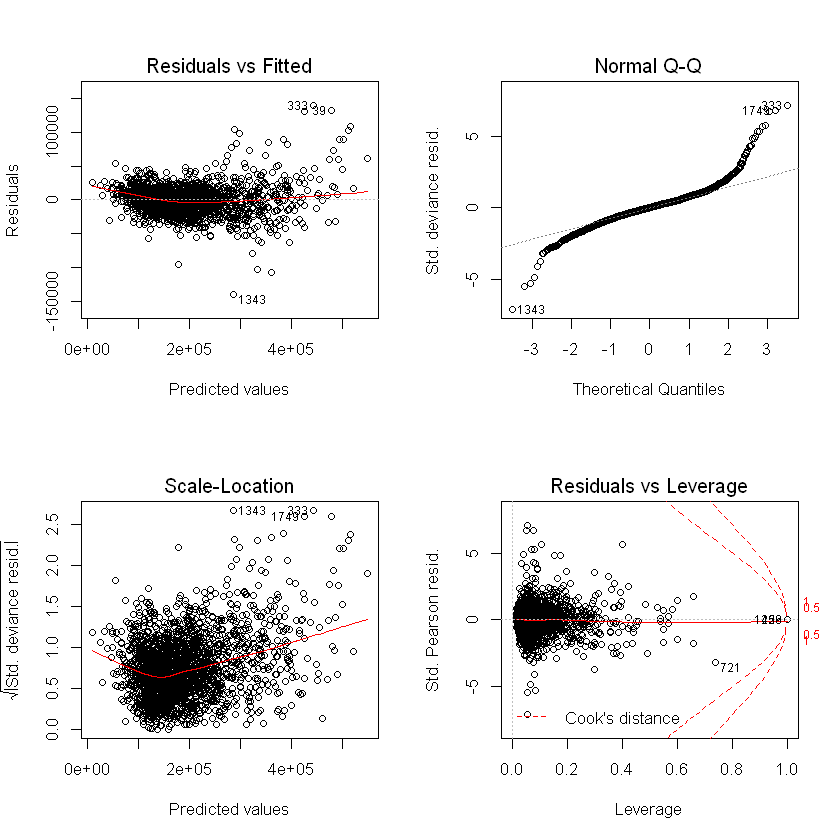

In [25]:
par(mfrow=c(2,2))
plot(lr.model_boot)

The above looks same as previous model.

In [26]:
sqrt(mean(lr.model_boot$residuals^2)) / 186000

[1] 0.1032428

## Forward Subset Selection

In [27]:
library(leaps)
leaps.model_fwd = regsubsets(SalePrice~.,data = houseData, method = "forward", nvmax = 64)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"13  linear dependencies found"

Reordering variables and trying again:


In [28]:
houseData$Condition.2 <- NULL
houseData$MS.SubClass <- NULL
houseData$MS.Zoning <- NULL
houseData$Functional <- NULL
houseData$Neighborhood <- NULL
houseData$Roof.Matl <- NULL
houseData$Exterior.1st <- NULL
houseData$Foundation <- NULL

Now we will do again the subset selection

In [29]:
leaps.model_fwd <- regsubsets(SalePrice~., data = houseData, method = "forward", nvmax = 56)

In [30]:
summary(leaps.model_fwd)

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = houseData, method = "forward", 
    nvmax = 56)
128 Variables  (and intercept)
                      Forced in Forced out
Lot.Frontage              FALSE      FALSE
Lot.Area                  FALSE      FALSE
Lot.ShapeIR2              FALSE      FALSE
Lot.ShapeIR3              FALSE      FALSE
Lot.ShapeReg              FALSE      FALSE
Land.ContourHLS           FALSE      FALSE
Land.ContourLow           FALSE      FALSE
Land.ContourLvl           FALSE      FALSE
Lot.ConfigCulDSac         FALSE      FALSE
Lot.ConfigFR2             FALSE      FALSE
Lot.ConfigFR3             FALSE      FALSE
Lot.ConfigInside          FALSE      FALSE
Land.SlopeMod             FALSE      FALSE
Land.SlopeSev             FALSE      FALSE
Condition.1Feedr          FALSE      FALSE
Condition.1Norm           FALSE      FALSE
Condition.1PosA           FALSE      FALSE
Condition.1PosN           FALSE      FALSE
Condition.1RRAe           FALSE  

In [31]:
leaps.fwd.summary = summary(leaps.model_fwd)
names(leaps.fwd.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

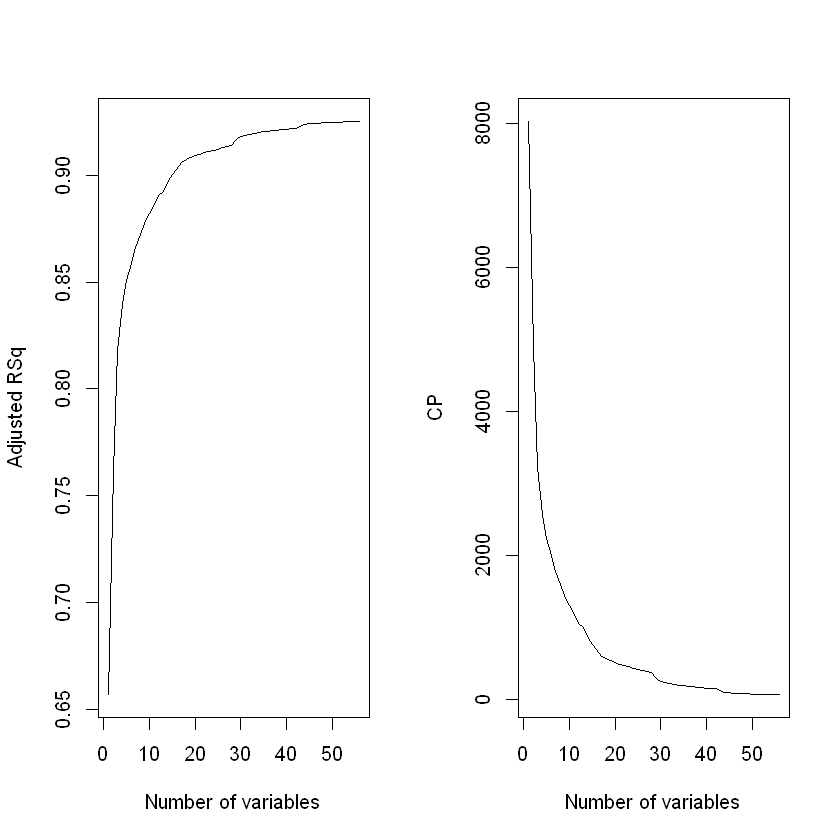

In [32]:
par(mfrow=c(1,2))
plot(leaps.fwd.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted RSq", type = "l")
plot(leaps.fwd.summary$cp, xlab = "Number of variables", ylab = "CP", type = "l")

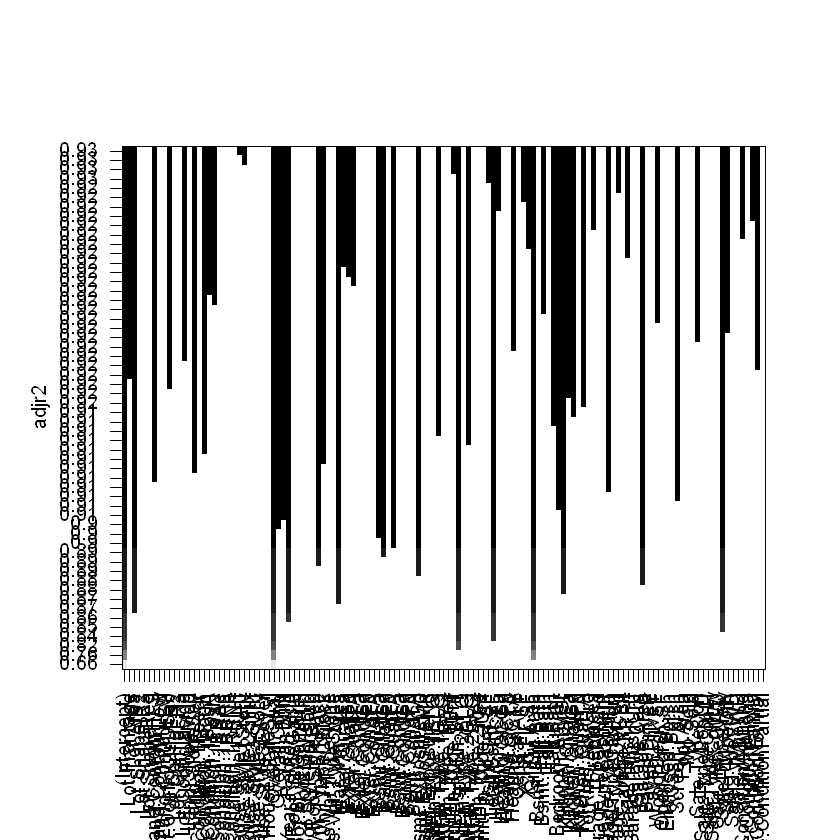

In [33]:
plot(leaps.model_fwd, scale = "adjr2")

In [34]:
which.min(leaps.fwd.summary$cp)

[1] 56

THe forward subset selection gave the 'cp' value for 56 variables has the least.

## Backward Subset Selection

In [35]:
leaps.model_bwd <- regsubsets(SalePrice~., data = houseData, method = "backward", nvmax = 56)

In [36]:
summary(leaps.model_bwd)

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = houseData, method = "backward", 
    nvmax = 56)
128 Variables  (and intercept)
                      Forced in Forced out
Lot.Frontage              FALSE      FALSE
Lot.Area                  FALSE      FALSE
Lot.ShapeIR2              FALSE      FALSE
Lot.ShapeIR3              FALSE      FALSE
Lot.ShapeReg              FALSE      FALSE
Land.ContourHLS           FALSE      FALSE
Land.ContourLow           FALSE      FALSE
Land.ContourLvl           FALSE      FALSE
Lot.ConfigCulDSac         FALSE      FALSE
Lot.ConfigFR2             FALSE      FALSE
Lot.ConfigFR3             FALSE      FALSE
Lot.ConfigInside          FALSE      FALSE
Land.SlopeMod             FALSE      FALSE
Land.SlopeSev             FALSE      FALSE
Condition.1Feedr          FALSE      FALSE
Condition.1Norm           FALSE      FALSE
Condition.1PosA           FALSE      FALSE
Condition.1PosN           FALSE      FALSE
Condition.1RRAe           FALSE 

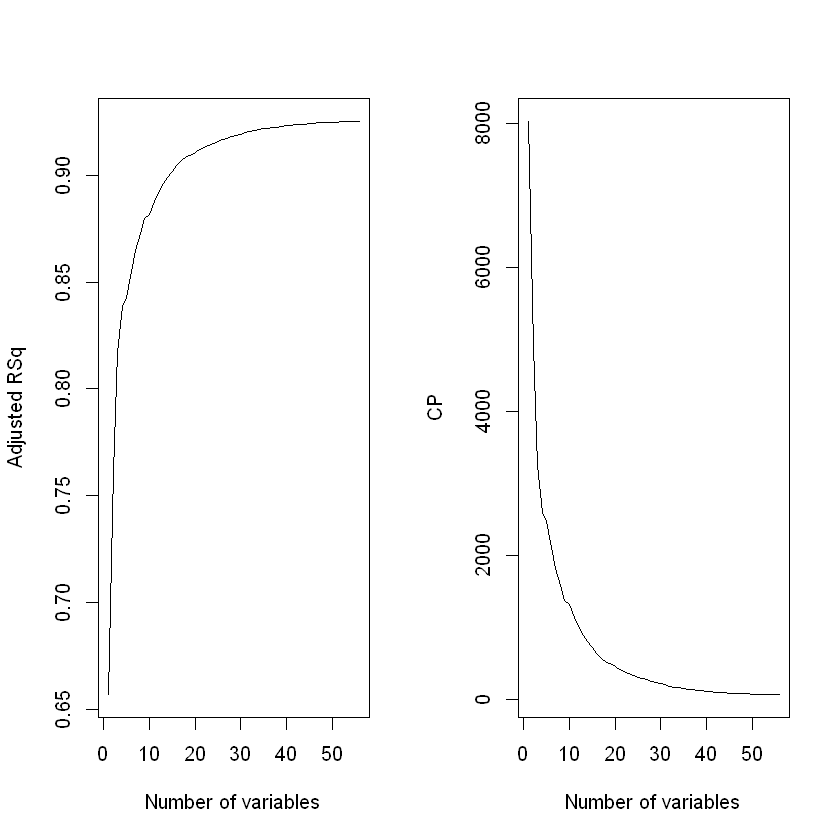

In [37]:
leaps.bwd.summary <- summary(leaps.model_bwd)
par(mfrow=c(1,2))
plot(leaps.bwd.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted RSq", type = "l")
plot(leaps.bwd.summary$cp, xlab = "Number of variables", ylab = "CP", type = "l")

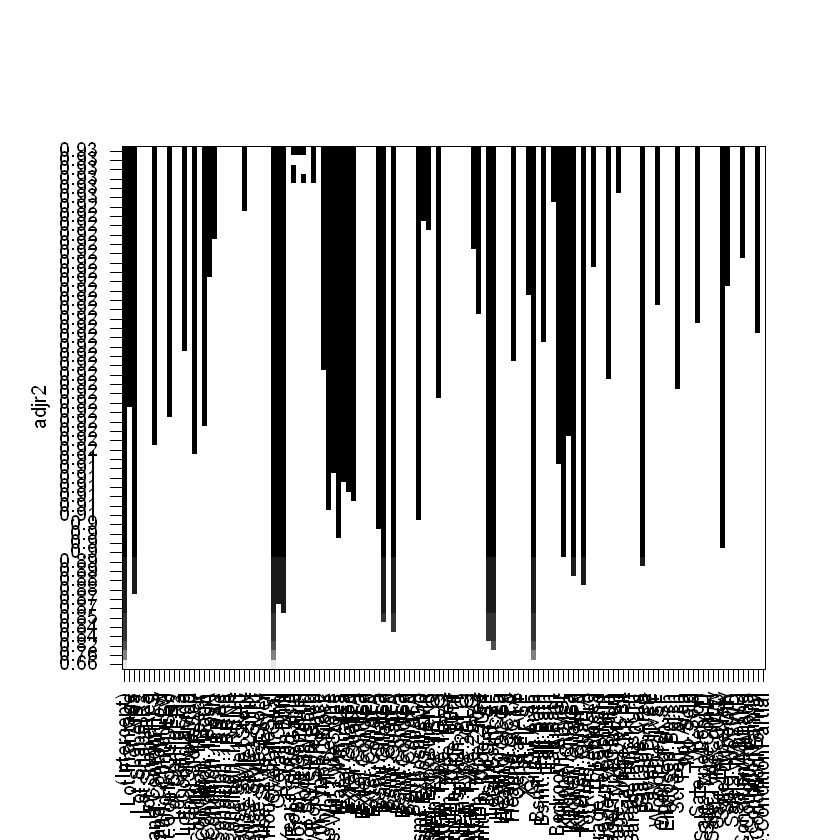

In [38]:
plot(leaps.model_bwd, scale = "adjr2")

In [39]:
which.min(leaps.bwd.summary$cp)

[1] 53

The Backward subset selection gave 53 variables.

Now we do the k-fold cross validation

## Ridge

In [44]:
library(glmnet)

In [45]:
x = model.matrix(SalePrice~., houseData)[,-1]
y = houseData$SalePrice
grid = 10 ^ seq(10, -2, length = 100)

In [46]:
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

In [47]:
dim(coef(ridge.mod))

[1] 129 100

In [48]:
names(ridge.mod)

[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

In [49]:
ridge.mod$lambda[50]

[1] 11497.57

In [50]:
coef(ridge.mod)[,50]

(Intercept)          Lot.Frontage              Lot.Area 
        -7.334116e+05          1.288316e+02          9.088221e-01 
         Lot.ShapeIR2          Lot.ShapeIR3          Lot.ShapeReg 
         5.334350e+03         -5.324052e+03         -1.210212e+03 
      Land.ContourHLS       Land.ContourLow       Land.ContourLvl 
         1.146369e+04         -7.534084e+03         -1.143670e+03 
    Lot.ConfigCulDSac         Lot.ConfigFR2         Lot.ConfigFR3 
         1.406810e+04         -4.893473e+03         -1.179493e+04 
     Lot.ConfigInside         Land.SlopeMod         Land.SlopeSev 
         2.638637e+03          4.887470e+02         -3.677007e+04 
     Condition.1Feedr       Condition.1Norm       Condition.1PosA 
         1.686898e+03          7.471808e+03          1.663856e+04 
      Condition.1PosN       Condition.1RRAe       Condition.1RRAn 
         1.368933e+04         -2.185838e+03         -4.928031e+02 
      Condition.1RRNe       Condition.1RRNn     House.Style1.5Unf 
        -1.927525e+04         -6.394790e+03          8.097692e+03 
    House.Style1Story     House.Style2.5Fin     House.Style2.5Unf 
         4.412215e+01         -3.815283e+03          3.029239e+03 
    House.Style2Story     House.StyleSFoyer       House.StyleSLvl 
         1.140148e+03         -1.649986e+03         -4.113452e+03 
         Overall.Qual          Overall.Cond            Year.Built 
         9.202219e+03          4.486503e+03          1.375792e+02 
       Year.Remod.Add       Roof.StyleGable     Roof.StyleGambrel 
         1.265820e+02         -2.905339e+02          3.598436e+03 
        Roof.StyleHip     Roof.StyleMansard        Roof.StyleShed 
         3.304711e+03         -4.655733e+03          1.511897e+04 
  Mas.Vnr.TypeBrkFace    Mas.Vnr.TypeCBlock      Mas.Vnr.TypeNone 
        -4.404400e+03         -8.297089e+04          4.588334e+03 
    Mas.Vnr.TypeStone          Mas.Vnr.Area          Exter.QualFa 
         6.527317e+03          4.068860e+01         -1.491579e+04 
         Exter.QualGd          Exter.QualTA          Exter.CondFa 
        -8.578857e+03         -1.374750e+04         -6.417769e+03 
         Exter.CondGd          Exter.CondPo          Exter.CondTA 
         8.606020e+02         -1.710987e+04          9.039720e+02 
          Bsmt.QualFa           Bsmt.QualGd           Bsmt.QualPo 
        -8.046070e+03         -1.438087e+04          4.519254e+03 
          Bsmt.QualTA           Bsmt.CondFa           Bsmt.CondGd 
        -1.034562e+04         -5.123465e+02          9.932489e+02 
          Bsmt.CondPo           Bsmt.CondTA       Bsmt.ExposureGd 
        -1.151677e+04         -3.534917e+02          1.104715e+04 
      Bsmt.ExposureMn       Bsmt.ExposureNo     BsmtFin.Type.1BLQ 
        -3.783344e+03         -3.951120e+03         -1.343167e+03 
    BsmtFin.Type.1GLQ     BsmtFin.Type.1LwQ     BsmtFin.Type.1Rec 
         6.824853e+03         -1.830728e+03         -2.377154e+03 
    BsmtFin.Type.1Unf          BsmtFin.SF.1     BsmtFin.Type.2BLQ 
        -2.324018e+01          1.600905e+01         -3.091991e+03 
    BsmtFin.Type.2GLQ     BsmtFin.Type.2LwQ     BsmtFin.Type.2Rec 
         1.374890e+04         -6.094610e+03         -5.285215e+03 
    BsmtFin.Type.2Unf           Bsmt.Unf.SF         Total.Bsmt.SF 
        -3.078372e+03         -3.502123e-01          2.510055e+01 
         Heating.QCFa          Heating.QCGd          Heating.QCPo 
        -7.644909e+03         -2.564790e+03         -8.393993e+03 
         Heating.QCTA          Central.AirY           X1st.Flr.SF 
        -5.885972e+03          1.469846e+03          2.073331e+01 
          X2nd.Flr.SF           Gr.Liv.Area        Bsmt.Full.Bath 
         1.624896e+01          2.475509e+01          2.032840e+03 
       Bsmt.Half.Bath             Full.Bath             Half.Bath 
        -5.112730e+03          3.970855e+03          6.013120e+03 
        Bedroom.AbvGr         Kitchen.AbvGr        Kitchen.QualFa 
        -3.310209e+03         -2.935313e+04         -8.36

The predict function alows us to calculate coefficients for lambda. The Co-efficients for lambda=50 are

In [54]:
predict(ridge.mod, s=50, type = "coefficients")[1:56,]

(Intercept)        Lot.Frontage            Lot.Area        Lot.ShapeIR2 
      -3.966421e+05        1.421754e+02        1.079209e+00        4.634335e+03 
       Lot.ShapeIR3        Lot.ShapeReg     Land.ContourHLS     Land.ContourLow 
      -1.128021e+04        1.732990e+02        1.191669e+04       -8.139531e+03 
    Land.ContourLvl   Lot.ConfigCulDSac       Lot.ConfigFR2       Lot.ConfigFR3 
       3.919419e+02        1.503117e+04       -5.857413e+03       -1.229050e+04 
   Lot.ConfigInside       Land.SlopeMod       Land.SlopeSev    Condition.1Feedr 
       3.203715e+03        4.154464e+02       -4.401692e+04        6.874424e+03 
    Condition.1Norm     Condition.1PosA     Condition.1PosN     Condition.1RRAe 
       1.283830e+04        2.142338e+04        1.645860e+04        3.544005e+03 
    Condition.1RRAn     Condition.1RRNe     Condition.1RRNn   House.Style1.5Unf 
       6.446308e+03       -9.223280e+03       -4.778874e+03        1.513302e+04 
  House.Style1Story   House.Style2.5Fin   House.Style2.5Unf   House.Style2Story 
       9.672427e+03       -1.062931e+04       -1.720191e+03       -1.772232e+03 
  House.StyleSFoyer     House.StyleSLvl        Overall.Qual        Overall.Cond 
       7.696097e+03        4.041531e+03        9.558238e+03        6.323790e+03 
         Year.Built      Year.Remod.Add     Roof.StyleGable   Roof.StyleGambrel 
       2.570530e+02        4.061200e+01        1.893371e+04        2.264978e+04 
      Roof.StyleHip   Roof.StyleMansard      Roof.StyleShed Mas.Vnr.TypeBrkFace 
       1.814234e+04        1.133154e+04        4.461726e+04        5.716998e+03 
 Mas.Vnr.TypeCBlock    Mas.Vnr.TypeNone   Mas.Vnr.TypeStone        Mas.Vnr.Area 
      -9.449427e+04        1.657073e+04        1.617064e+04        4.082217e+01 
       Exter.QualFa        Exter.QualGd        Exter.QualTA        Exter.CondFa 
      -3.200010e+04       -2.333670e+04       -2.850709e+04        4.130306e+03 
       Exter.CondGd        Exter.CondPo        Exter.CondTA         Bsmt.QualFa 
       9.670732e+03       -5.978539e+03        9.869824e+03       -1.449883e+04 
        Bsmt.QualGd         Bsmt.QualPo         Bsmt.QualTA         Bsmt.CondFa 
      -1.979478e+04       -2.351517e+03       -1.674228e+04        4.673525e+03

To choose a optimal lambda, we do CV here

In [56]:
train <- sample(1:nrow(x), nrow(x)/2)
test <- (-train)
y.test <- y[test]
ridge.mod <- glmnet(x[train,], y[train], alpha = 0, lambda = grid, thresh = 1e-12)

In [57]:
cv.out=cv.glmnet(x[train,],y[train],alpha=0)

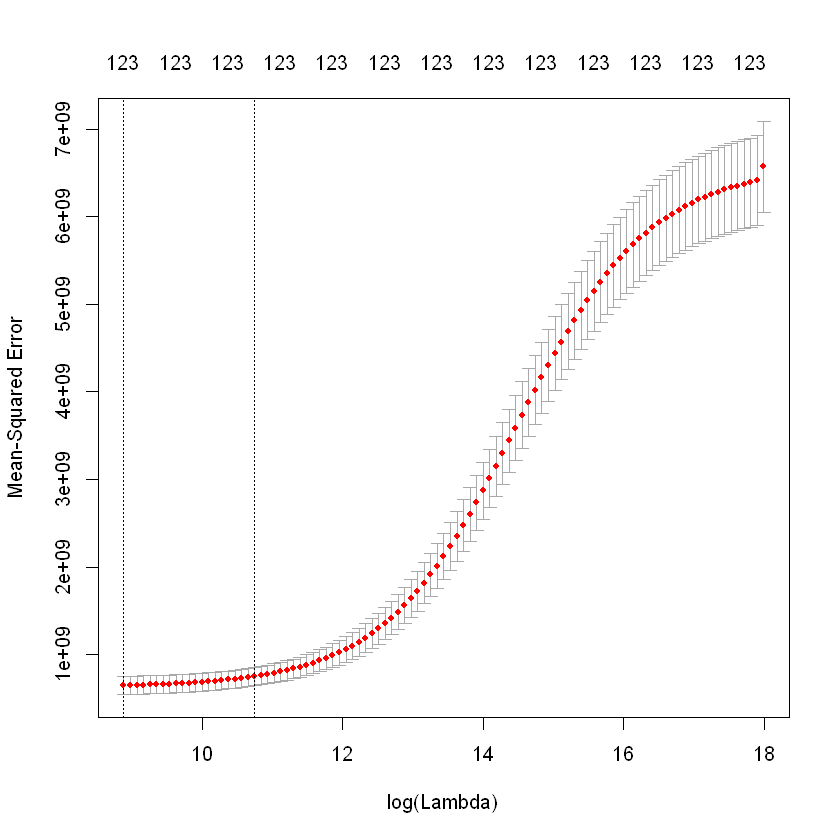

In [58]:
plot(cv.out)

In [59]:
bestlam <- cv.out$lambda.min
bestlam

[1] 7204.927

In [60]:
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 702238194

In [61]:
sqrt(mean((ridge.pred-y.test)^2)) / 186000

[1] 0.1424719

Now since we found the best lambda, we can use all of data to build model with this lambda.

In [62]:
ridge.model <- glmnet(x, y, alpha = 0)
predict(ridge.model, type = "coefficients", s = bestlam)[1:56,]

(Intercept)        Lot.Frontage            Lot.Area        Lot.ShapeIR2 
      -6.747742e+05        1.311551e+02        9.658254e-01        5.090425e+03 
       Lot.ShapeIR3        Lot.ShapeReg     Land.ContourHLS     Land.ContourLow 
      -6.732058e+03       -8.446624e+02        1.169214e+04       -7.823040e+03 
    Land.ContourLvl   Lot.ConfigCulDSac       Lot.ConfigFR2       Lot.ConfigFR3 
      -6.628726e+02        1.445022e+04       -4.974015e+03       -1.214644e+04 
   Lot.ConfigInside       Land.SlopeMod       Land.SlopeSev    Condition.1Feedr 
       2.911286e+03        3.979438e+02       -4.062965e+04        2.997887e+03 
    Condition.1Norm     Condition.1PosA     Condition.1PosN     Condition.1RRAe 
       8.730357e+03        1.772410e+04        1.438546e+04       -6.847767e+02 
    Condition.1RRAn     Condition.1RRNe     Condition.1RRNn   House.Style1.5Unf 
       9.299960e+02       -1.782758e+04       -6.255171e+03        8.910769e+03 
  House.Style1Story   House.Style2.5Fin   House.Style2.5Unf   House.Style2Story 
       1.226434e+03       -5.345344e+03        2.253411e+03        6.630189e+02 
  House.StyleSFoyer     House.StyleSLvl        Overall.Qual        Overall.Cond 
      -1.851747e+02       -2.879030e+03        9.573191e+03        4.932522e+03 
         Year.Built      Year.Remod.Add     Roof.StyleGable   Roof.StyleGambrel 
       1.605022e+02        1.086465e+02        9.353130e+02        4.589591e+03 
      Roof.StyleHip   Roof.StyleMansard      Roof.StyleShed Mas.Vnr.TypeBrkFace 
       3.361570e+03       -4.241623e+03        2.000611e+04       -4.246343e+03 
 Mas.Vnr.TypeCBlock    Mas.Vnr.TypeNone   Mas.Vnr.TypeStone        Mas.Vnr.Area 
      -9.009935e+04        5.671675e+03        6.673417e+03        4.182494e+01 
       Exter.QualFa        Exter.QualGd        Exter.QualTA        Exter.CondFa 
      -1.725047e+04       -1.091045e+04       -1.583544e+04       -5.566447e+03 
       Exter.CondGd        Exter.CondPo        Exter.CondTA         Bsmt.QualFa 
       1.324551e+03       -1.591854e+04        1.384181e+03       -9.649884e+03 
        Bsmt.QualGd         Bsmt.QualPo         Bsmt.QualTA         Bsmt.CondFa 
      -1.595346e+04        2.911419e+03       -1.196278e+04       -5.718070e+01

In [65]:
predict(ridge.model, type = "coefficients", s = bestlam)[1:128,]

(Intercept)          Lot.Frontage              Lot.Area 
        -6.747742e+05          1.311551e+02          9.658254e-01 
         Lot.ShapeIR2          Lot.ShapeIR3          Lot.ShapeReg 
         5.090425e+03         -6.732058e+03         -8.446624e+02 
      Land.ContourHLS       Land.ContourLow       Land.ContourLvl 
         1.169214e+04         -7.823040e+03         -6.628726e+02 
    Lot.ConfigCulDSac         Lot.ConfigFR2         Lot.ConfigFR3 
         1.445022e+04         -4.974015e+03         -1.214644e+04 
     Lot.ConfigInside         Land.SlopeMod         Land.SlopeSev 
         2.911286e+03          3.979438e+02         -4.062965e+04 
     Condition.1Feedr       Condition.1Norm       Condition.1PosA 
         2.997887e+03          8.730357e+03          1.772410e+04 
      Condition.1PosN       Condition.1RRAe       Condition.1RRAn 
         1.438546e+04         -6.847767e+02          9.299960e+02 
      Condition.1RRNe       Condition.1RRNn     House.Style1.5Unf 
        -1.782758e+04         -6.255171e+03          8.910769e+03 
    House.Style1Story     House.Style2.5Fin     House.Style2.5Unf 
         1.226434e+03         -5.345344e+03          2.253411e+03 
    House.Style2Story     House.StyleSFoyer       House.StyleSLvl 
         6.630189e+02         -1.851747e+02         -2.879030e+03 
         Overall.Qual          Overall.Cond            Year.Built 
         9.573191e+03          4.932522e+03          1.605022e+02 
       Year.Remod.Add       Roof.StyleGable     Roof.StyleGambrel 
         1.086465e+02          9.353130e+02          4.589591e+03 
        Roof.StyleHip     Roof.StyleMansard        Roof.StyleShed 
         3.361570e+03         -4.241623e+03          2.000611e+04 
  Mas.Vnr.TypeBrkFace    Mas.Vnr.TypeCBlock      Mas.Vnr.TypeNone 
        -4.246343e+03         -9.009935e+04          5.671675e+03 
    Mas.Vnr.TypeStone          Mas.Vnr.Area          Exter.QualFa 
         6.673417e+03          4.182494e+01         -1.725047e+04 
         Exter.QualGd          Exter.QualTA          Exter.CondFa 
        -1.091045e+04         -1.583544e+04         -5.566447e+03 
         Exter.CondGd          Exter.CondPo          Exter.CondTA 
         1.324551e+03         -1.591854e+04          1.384181e+03 
          Bsmt.QualFa           Bsmt.QualGd           Bsmt.QualPo 
        -9.649884e+03         -1.595346e+04          2.911419e+03 
          Bsmt.QualTA           Bsmt.CondFa           Bsmt.CondGd 
        -1.196278e+04         -5.718070e+01          8.134530e+02 
          Bsmt.CondPo           Bsmt.CondTA       Bsmt.ExposureGd 
        -1.182963e+04         -2.987420e+02          1.042618e+04 
      Bsmt.ExposureMn       Bsmt.ExposureNo     BsmtFin.Type.1BLQ 
        -4.004448e+03         -3.911985e+03         -1.134072e+03 
    BsmtFin.Type.1GLQ     BsmtFin.Type.1LwQ     BsmtFin.Type.1Rec 
         6.651001e+03         -1.749743e+03         -2.334675e+03 
    BsmtFin.Type.1Unf          BsmtFin.SF.1     BsmtFin.Type.2BLQ 
         4.748650e+02          1.630714e+01         -3.885457e+03 
    BsmtFin.Type.2GLQ     BsmtFin.Type.2LwQ     BsmtFin.Type.2Rec 
         1.347626e+04         -7.267611e+03         -6.264424e+03 
    BsmtFin.Type.2Unf           Bsmt.Unf.SF         Total.Bsmt.SF 
        -4.080715e+03         -1.017046e+00          2.673943e+01 
         Heating.QCFa          Heating.QCGd          Heating.QCPo 
        -7.486372e+03         -2.438062e+03         -8.617569e+03 
         Heating.QCTA          Central.AirY           X1st.Flr.SF 
        -5.783381e+03          9.301188e+02          2.034268e+01 
          X2nd.Flr.SF           Gr.Liv.Area        Bsmt.Full.Bath 
         1.901931e+01          2.645797e+01          1.469790e+03 
       Bsmt.Half.Bath             Full.Bath             Half.Bath 
        -5.156717e+03          3.516790e+03          5.747584e+03 
        Bedroom.AbvGr         Kitchen.AbvGr        Kitchen.QualFa 
        -3.755513e+03         -3.025172e+04         -1.06

## Lasso

In [66]:
lasso.mod =glmnet (x[train ,],y[train],alpha =1, lambda =grid)

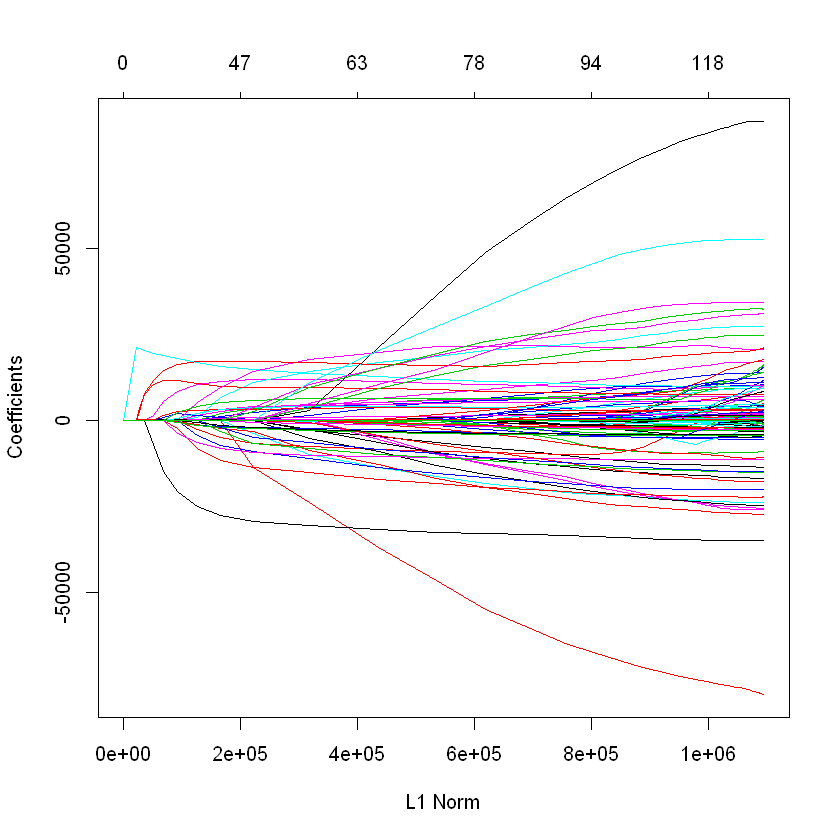

In [67]:
plot(lasso.mod)

Now we will use CV to find the best lambda

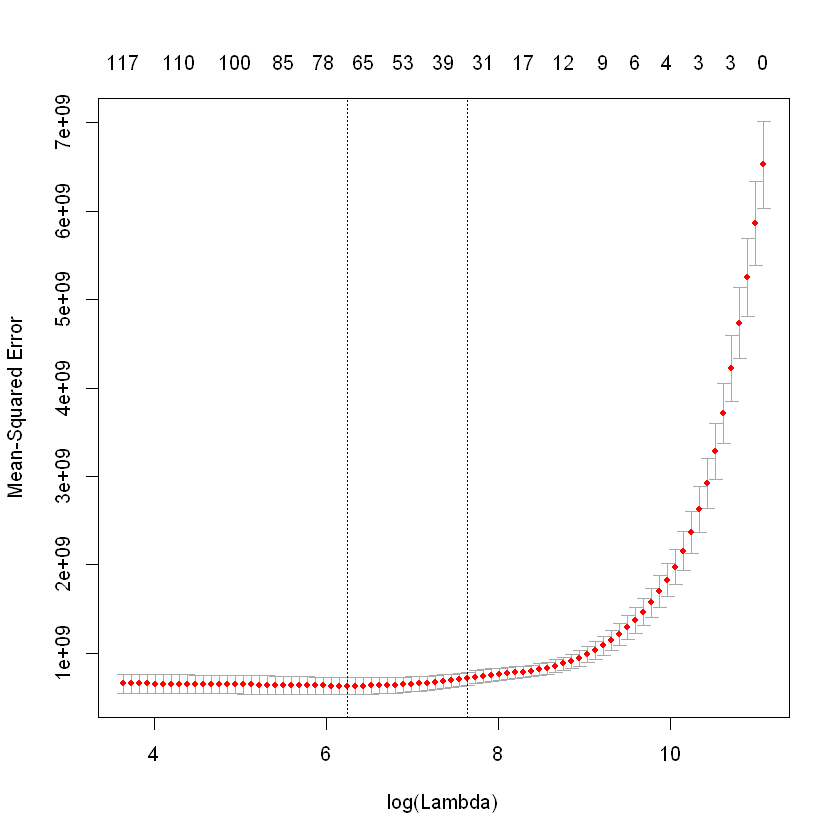

In [68]:
cv.out =cv.glmnet (x[train ,],y[train],alpha =1)
plot(cv.out)

In [69]:
bestlam =cv.out$lambda.min
lasso.pred=predict (lasso.mod,s=bestlam,newx=x[test,])
mean(( lasso.pred -y.test)^2)

[1] 688591300

In [70]:
mean((ridge.pred-y.test)^2)

[1] 702238194

The MSE in both LASSO and RIDGE cases are almost equal

In [71]:
out=glmnet (x,y,alpha =1, lambda =grid)
lasso.coef=predict(out,type ="coefficients",s=bestlam )[1:56,]

In [72]:
lasso.coef[lasso.coef!=0]

(Intercept)        Lot.Frontage            Lot.Area        Lot.ShapeIR2 
      -7.170298e+05        1.010345e+02        9.474088e-01        3.033595e+03 
       Lot.ShapeIR3     Land.ContourHLS     Land.ContourLow   Lot.ConfigCulDSac 
      -1.770867e+00        1.098805e+04       -1.709097e+03        1.216616e+04 
      Lot.ConfigFR2       Lot.ConfigFR3    Lot.ConfigInside       Land.SlopeSev 
      -2.453599e+03       -4.579434e+03        1.550061e+03       -3.023909e+04 
    Condition.1Norm     Condition.1PosA     Condition.1PosN     Condition.1RRNe 
       6.230362e+03        1.155104e+04        7.796319e+03       -8.183362e+02 
    Condition.1RRNn   House.Style1.5Unf   House.Style2.5Fin        Overall.Qual 
      -1.115251e+02        1.842496e+03       -2.176108e+02        1.145813e+04 
       Overall.Cond          Year.Built      Year.Remod.Add       Roof.StyleHip 
       5.255715e+03        2.491043e+02        1.087563e+02        6.851661e+02 
Mas.Vnr.TypeBrkFace  Mas.Vnr.TypeCBlock   Mas.Vnr.TypeStone        Mas.Vnr.Area 
      -8.965805e+03       -6.697871e+04        2.076032e+02        3.988659e+01 
       Exter.QualFa        Exter.QualGd        Exter.QualTA        Exter.CondFa 
      -1.570304e+04       -1.132787e+04       -1.631078e+04       -3.847830e+03 
        Bsmt.QualFa         Bsmt.QualGd         Bsmt.QualTA 
      -8.268736e+03       -1.645721e+04       -1.302738e+04

In [76]:
lasso.coef=predict(out,type ="coefficients",s=bestlam )[1:129,]

In [78]:
lasso.coef[lasso.coef!=0]

(Intercept)          Lot.Frontage              Lot.Area 
        -7.170298e+05          1.010345e+02          9.474088e-01 
         Lot.ShapeIR2          Lot.ShapeIR3       Land.ContourHLS 
         3.033595e+03         -1.770867e+00          1.098805e+04 
      Land.ContourLow     Lot.ConfigCulDSac         Lot.ConfigFR2 
        -1.709097e+03          1.216616e+04         -2.453599e+03 
        Lot.ConfigFR3      Lot.ConfigInside         Land.SlopeSev 
        -4.579434e+03          1.550061e+03         -3.023909e+04 
      Condition.1Norm       Condition.1PosA       Condition.1PosN 
         6.230362e+03          1.155104e+04          7.796319e+03 
      Condition.1RRNe       Condition.1RRNn     House.Style1.5Unf 
        -8.183362e+02         -1.115251e+02          1.842496e+03 
    House.Style2.5Fin          Overall.Qual          Overall.Cond 
        -2.176108e+02          1.145813e+04          5.255715e+03 
           Year.Built        Year.Remod.Add         Roof.StyleHip 
         2.491043e+02          1.087563e+02          6.851661e+02 
  Mas.Vnr.TypeBrkFace    Mas.Vnr.TypeCBlock     Mas.Vnr.TypeStone 
        -8.965805e+03         -6.697871e+04          2.076032e+02 
         Mas.Vnr.Area          Exter.QualFa          Exter.QualGd 
         3.988659e+01         -1.570304e+04         -1.132787e+04 
         Exter.QualTA          Exter.CondFa           Bsmt.QualFa 
        -1.631078e+04         -3.847830e+03         -8.268736e+03 
          Bsmt.QualGd           Bsmt.QualTA           Bsmt.CondPo 
        -1.645721e+04         -1.302738e+04         -2.409575e+02 
      Bsmt.ExposureGd       Bsmt.ExposureMn       Bsmt.ExposureNo 
         1.045801e+04         -8.776584e+02         -1.667757e+03 
    BsmtFin.Type.1GLQ     BsmtFin.Type.1Rec          BsmtFin.SF.1 
         5.282606e+03         -4.605179e+02          1.795506e+01 
    BsmtFin.Type.2GLQ     BsmtFin.Type.2LwQ         Total.Bsmt.SF 
         1.167529e+04         -3.215249e+01          2.767449e+01 
         Heating.QCFa          Heating.QCGd          Heating.QCTA 
        -3.242465e+03         -2.142702e+02         -4.155763e+03 
          X2nd.Flr.SF           Gr.Liv.Area        Bsmt.Full.Bath 
         2.419324e-01          5.430324e+01          2.413499e+02 
       Bsmt.Half.Bath             Half.Bath         Bedroom.AbvGr 
        -3.942465e+03          3.213300e+03         -3.016931e+03 
        Kitchen.AbvGr        Kitchen.QualFa        Kitchen.QualGd 
        -2.725115e+04         -1.018214e+04         -1.617438e+04 
       Kitchen.QualTA         TotRms.AbvGrd            Fireplaces 
        -1.686151e+04          2.715999e+02          1.945891e+03 
   Garage.TypeBasment    Garage.TypeBuiltIn         Garage.Yr.Blt 
        -1.217710e+03          8.938597e+03          7.067155e-01 
     Garage.FinishRFn           Garage.Cars           Garage.Area 
        -1.627172e+03          2.081442e+03          2.585281e+01 
         Wood.Deck.SF         Open.Porch.SF          Screen.Porch 
         1.156109e+01          4.172969e+00          3.527266e+01 
         Sale.TypeCon        Sale.TypeConLI          Sale.TypeCWD 
         1.686737e+04         -1.209579e+00          3.499243e+02 
         Sale.TypeNew          Sale.TypeOth Sale.ConditionAdjLand 
         1.783690e+04          1.945533e+04          8.087860e+03 
 Sale.ConditionNormal 
         2.703278e+03

In [79]:
names(AmesHousing)

[1] "Order"           "PID"             "MS SubClass"     "MS Zoning"      
 [5] "Lot Frontage"    "Lot Area"        "Street"          "Alley"          
 [9] "Lot Shape"       "Land Contour"    "Utilities"       "Lot Config"     
[13] "Land Slope"      "Neighborhood"    "Condition 1"     "Condition 2"    
[17] "Bldg Type"       "House Style"     "Overall Qual"    "Overall Cond"   
[21] "Year Built"      "Year Remod/Add"  "Roof Style"      "Roof Matl"      
[25] "Exterior 1st"    "Exterior 2nd"    "Mas Vnr Type"    "Mas Vnr Area"   
[29] "Exter Qual"      "Exter Cond"      "Foundation"      "Bsmt Qual"      
[33] "Bsmt Cond"       "Bsmt Exposure"   "BsmtFin Type 1"  "BsmtFin SF 1"   
[37] "BsmtFin Type 2"  "BsmtFin SF 2"    "Bsmt Unf SF"     "Total Bsmt SF"  
[41] "Heating"         "Heating QC"      "Central Air"     "Electrical"     
[45] "1st Flr SF"      "2nd Flr SF"      "Low Qual Fin SF" "Gr Liv Area"    
[49] "Bsmt Full Bath"  "Bsmt Half Bath"  "Full Bath"       "Half Bath"      
[53] "Bedroom AbvGr"   "Kitchen AbvGr"   "Kitchen Qual"    "TotRms AbvGrd"  
[57] "Functional"      "Fireplaces"      "Fireplace Qu"    "Garage Type"    
[61] "Garage Yr Blt"   "Garage Finish"   "Garage Cars"     "Garage Area"    
[65] "Garage Qual"     "Garage Cond"     "Paved Drive"     "Wood Deck SF"   
[69] "Open Porch SF"   "Enclosed Porch"  "3Ssn Porch"      "Screen Porch"   
[73] "Pool Area"       "Pool QC"         "Fence"           "Misc Feature"   
[77] "Misc Val"        "Mo Sold"         "Yr Sold"         "Sale Type"      
[81] "Sale Condition"  "SalePrice"

The coefficients are: 45 variables
Sale.Condition, Sale.Type, Screen Porch, Screen.Porch, Open.Porch.SF, 

In [96]:
houseData$Sale.Type <- NULL
houseData$Kitchen.Qual <- NULL
houseData$Heating.QC <- NULL
houseData$Bsmt.Qual <- NULL
houseData$Mas.Vnr.Type <- NULL
houseData$Condition.1 <- NULL
houseData$Sale.Condition <- NULL
houseData$Heating.QC <- NULL
houseData$Bsmt.Cond <- NULL
houseData$Roof.Style <- NULL
houseData$Exter.Cond <- NULL

## K Nearest neighbour regression

In [97]:
library(FNN)
houseData.mm <- model.matrix(SalePrice~. -1, houseData)

In [98]:
train <- sample(2214, 1700)

In [99]:
train.x <- scale(houseData.mm[train,])
test.x <- scale(houseData.mm[-train,])

In [100]:
dim(houseData)

[1] 2214   46

In [101]:
dim(houseData.mm)

[1] 2214   78

In [102]:
train.y <- houseData[train,46]
test.y <- houseData[-train,46]

In [103]:
knn.fit = knn.reg(train.x, test.x, train.y, k=5)

In [104]:
mean((test.y - knn.fit$pred) ^ 2)

[1] 1197442137

In [105]:
errs = rep(0,15)
for(i in 1:15){
knn.fit = knn.reg(train.x, test.x, train.y, k=i)
errs[i] = mean((test.y - knn.fit$pred)^2)
}

In [106]:
errs

[1] 1693600050 1354910073 1287086669 1281176679 1197442137 1169183399
 [7] 1145575481 1111596555 1096733531 1094934785 1108834687 1109138653
[13] 1104868756 1108866911 1084343043

In [107]:
which.min(errs)

[1] 15

## PCR

In [109]:
library(pls)
pcr.fit <- pcr(SalePrice~., data = houseData, subset = train, scale = TRUE, validation = "CV")


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



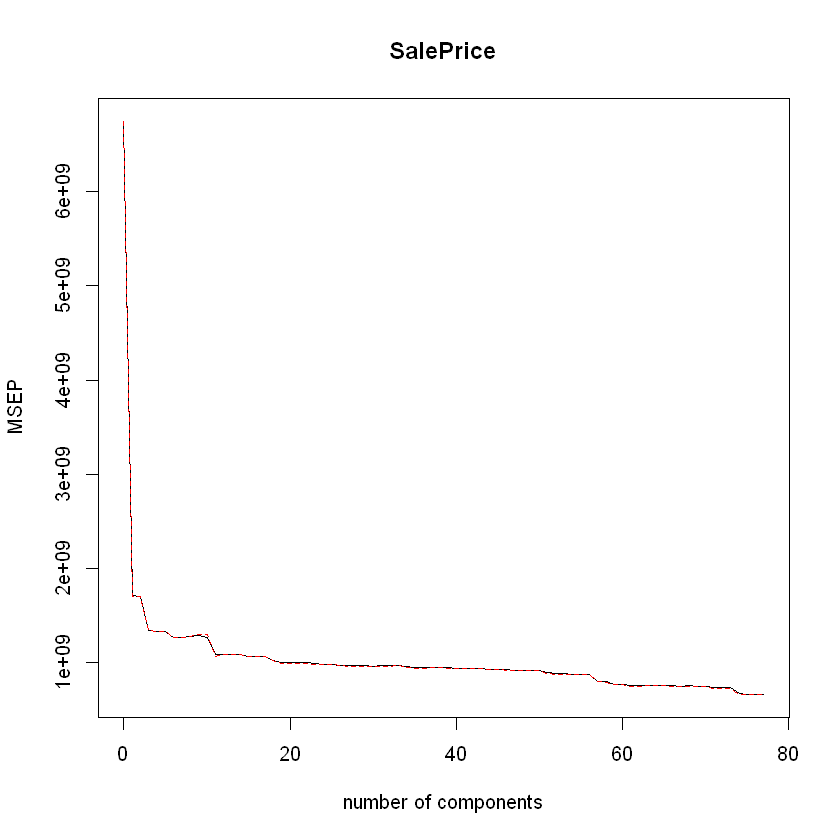

In [110]:
validationplot(pcr.fit, val.type = "MSEP")

In [111]:
summary(pcr.fit)

Data: 	X dimension: 1700 77 
	Y dimension: 1700 1
Fit method: svdpc
Number of components considered: 77

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           82131    41331    41245    36629    36510    36509    35648
adjCV        82131    41324    41241    36592    36489    36490    35622
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       35675    35757    35916     35559     32914     33032     33014
adjCV    35668    35786    35976     35983     32634     32954     32962
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        32943     32696     32624     32627     32020     31638     31620
adjCV     32934     32626     32581     32685     31941     31504     31533
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        31620     31577     31410     31392     31333     31223     31158
adjCV     31523  

In [113]:
pcr.pred = predict(pcr.fit, houseData[-train,-46], ncomp=3)
mean((pcr.pred - houseData[-train,46])^2)

[1] 1191446112